<div align="center">

# Selection Sort e Merge Sort

### Confronto tra i due algoritmi di ordinamento


<small>*8 Febbraio 2024*</small><br/>
<small>Laboratorio di Algoritmi - *Niccolò Caselli*</small>  

</div>

Importiamo le librerie necessarie

In [55]:
import random
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import math

Configurazione test

TEST_MAX_DIMENSION: Dimensione massima della lista su cui eseguire i test di ordinamento <br/>
TEST_STEP: Differenza di dimensione delle liste tra ogni iterazione


In [56]:
# Dimensioni consigliate per la massima resa:
# TEST_MAX_DIMENSION = 3000000
# TEST_STEP = 50000

# Dimensioni consigliate per test veloci:
TEST_MAX_DIMENSION = 10000
TEST_STEP = 600

Funzione che genera una lista casuale di dimensione n

In [57]:
def random_list(n):
   A=np.arange(n)
   random.shuffle(A)
   return A

# Testiamo la funzione
A = random_list(10)
print(A)

[9 7 2 8 4 6 5 3 1 0]


Funzione ausiliaria per verificare che un algoritmo di ordinamento sia corretto

In [58]:
def is_sorted(A):
    for i in range(1,len(A)):
        if A[i-1] > A[i]:
            return False
    return True


def is_sorting_algorithm(algorithm_function):
    is_working = True
    for n in [10]:
        A = random_list(n)
        algorithm_function(A)
    
        if  not is_sorted(A):
            is_working = False
            break
    
    if is_working:
        print(algorithm_function.__name__ + ": FUNZIONA!")
    else:
        print(algorithm_function.__name__ + ": NON HA CORETTAMENTE ORDINATO LA LISTA")
            
    

### Selection Sort

Selection Sort è un basilare algoritmo di ordinamento funzionante per confronti.
L'algoritmo consiste nel selezionare l'elemento minimo ad ogni iterazione e posizionarlo all'inzio della porizione lista non ordinata.
Possiamo quindi dividere la lista in due sottoliste, rispettivamente: quella già ordinata e quella di valori non ancora ordinati.
All'inzio dell'algoritmo la sottolista ordinatà è vuota, mentre quella da ordinare di conseguenza piena.

L'algoritmo prende in ingresso la lista A e <ins>ordina sul posto</ins>.


In [59]:
def selection_sort(A):
    n = len(A) # lunghezza della lista

    for i in range(n - 1): 
        # Trova l'indice del minimo elemento nella porzione della lista non ordinata
        min_index = i
        for j in range(i + 1, n):
            if A[j] < A[min_index]:
                min_index = j

        # Scambia il minimo con il primo elemento non ordinato
        A[i], A[min_index] = A[min_index], A[i]

In [60]:
# Testiamo l'implementazione del selection sort
is_sorting_algorithm(selection_sort)


selection_sort: FUNZIONA!


### Merge Sort

Merge Sort è un algiritmo ricorsivo basato su confronti.
L'algoritmo funziona partendo da una lista _A[p:r]_ e dividendola in due sottoliste _A[p:q]_ e _A[q+1:r]_ tale che q è il punto di mezzo di _A[p:r]_. Le due sottoliste vengono quindi quindi ordinate ricorsivamente per poi, come ultimo passo, combinare le due sotto liste ordinate _A[p:q]_ e _A[q + 1:r]_
in un singolo array ordinato _A[p:r]_

Risulta evidente quindi come l'algoritmo segua la strategia del:
- Divide
- Impera
- Combina



Invariante di ciclo: <br/>
_"Prima della k-esima iterazione il sottoarray A[p:k-1] è ordinato e contiene i k-p elementi più piccoli dei sottoarray L e R. Inoltre L[i] e R[j] sono rispettivamente gli elementi più piccoli dei loro array non ancora inseriti in A"_

Divenda subito evidente una prima differenza con selection sort: l'algoritmo di Merge Sort ha bisogno di allocare sottoarray ausiliari e quindi richiede memoria addizionale.

In [61]:
# Funzione di Merge Sort
def merge_sort(A):
    merge_sort_aux(A, 0, len(A) - 1)

# Funzione di supporto per Merge Sort
# (Ricorsiva)
def merge_sort_aux(A, p, r):
    if p < r:
        q = (p + r) // 2  # Divisione intera
        merge_sort_aux(A, p, q)
        merge_sort_aux(A, q + 1, r)
        merge(A, p, q, r)

def merge(A, p, q, r):
    # Calcola le dimensioni delle due sottoliste
    n1 = q - p + 1
    n2 = r - q

    # Creazione due array NumPy inizialmente inizalizzati a 0 
    # Sono di tipo float per supportare le sentinelle
    L = np.zeros(n1 + 1, dtype=float)
    R = np.zeros(n2 + 1, dtype=float)

    # Copia dei dati negli array NumPy
    L[:n1] = [A[p + i] for i in range(n1)]
    R[:n2] = [A[q + 1 + j] for j in range(n2)]

    # Sentinelle
    L[n1] = np.inf
    R[n2] = np.inf

    i = j = 0

    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1 # Incremento l'indice della sottolista di sinistra per preservare l'invariante di ciclo
        else:
            A[k] = R[j]
            j += 1 # Incremento l'indice della sottolista di destra 

In [62]:
# Testiamo l'implementazione del merge sort
is_sorting_algorithm(merge_sort)

merge_sort: FUNZIONA!


# Prestazioni
Appurato che entrambi gli algoritmi funzionano testiamo le prestazioni al crescere delle liste da ordinare 

Funzione per valutare le prestazioni di un algoritmo

In [63]:
def test_algo(algo_function, maxRange = TEST_MAX_DIMENSION, minRange = 2, step = TEST_STEP):

    results = {} # Dizionario per memorizzare i tempi di esecuzione per ogni dimensione di input

    for i in range(minRange, maxRange, step):
        A = random_list(i)
        start = timer()
        algo_function(A)
        end = timer()
        results[i] = end - start 

    return results

Funzione ausiliaria per disegnare il grafico dei tempi di esecuzione di un algoritmo

Prende in ingresso il dizionario dei risultati prodotto dalla funzione _test_algo_


In [64]:
def plot_results(results, title, color):

    plt.xlabel('Dimensione di input')
    plt.ylabel('Tempo di esecuzione (s)')

    x = list(results.keys())
    y = list(results.values())
    plt.title(title)
    plt.plot(x, y, color=color, linestyle='solid')


    plt.show()

Testiamo l'algoritmo di selection sort

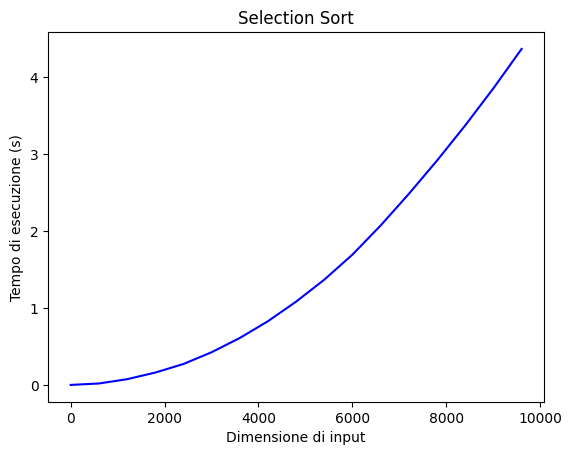

In [65]:
selection_sort_results = test_algo(selection_sort)
plot_results(selection_sort_results, "Selection Sort", "blue")

Risulta quindi evidente che il tempo di esecuzione cresce in modo quadratico al crescere della dimensione della lista da ordianre. La complessità dell'algoritmo, data una distribuzione uniforme di input, è quindi &theta;(n^2)




Testiamo l'algoritmo di Merge Sort

In [66]:
merge_sort_results = test_algo(merge_sort)


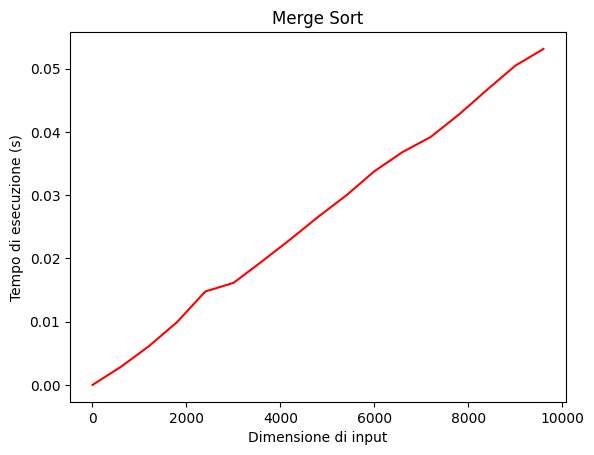

In [67]:
plot_results(merge_sort_results, "Merge Sort", "red")

È subito chiaro come le prestazioni crescano inferiorimente rispetto al selection sort. Tuttavia risulta difficile leggere il grafico: è noto dal risultato teorico che la complesità asintotica del Merge Sort è n*log(n) mentre la nostra rappresentazione grafica sembra quasi lineare.

Sappiamo però che non è così poiché, ce lo dice sempre la teoira e possiamo dimostrarlo, non è possibile sviluppare un algoritmo di ordinamento per confronto che abbia prestazioni asintotiche migliori di n*log(n).


Cerchiamo quindi di contestualizzare il grafico.


Rappresentiamo due funzioni note che ci possano aiutare nel confornto del risultato:
\begin{gather*}
f(n)= w \cdot n \cdot log(n)
\\
g(n)= w \cdot n 
\end{gather*}

Con w costante.
È quindi fondamentale che sia f(x), sia g(x) siano considerate a fronte di una costante che deve essere uguale nelle due funzioni. Ma cosa rappresenta questa costante?
W in questo caso è un'approssimazione teorica del tempo in secondi che il calcolatore impiega per eseguire un'operazione elementare.



Facendo ancora una volta ricorso alla teoira possiamo stimare w  in questo specifico caso:

\begin{gather*}

w = \frac{\text{tempo di esecuzione del merge sort}}{\text{n} \cdot \text{log(n)}}  

\end{gather*}

Nel mio caso ho ottenuto dai test precedenti che il mio calcolatore ha eseguito il merge sort di una lista di 3 milioni di elementi in circa 24 secondi. Possiamo quindi stimare l'ordine di grandezza di w

\begin{gather*}
w = \frac{\text{24}}{\text{3000000} \cdot \text{log(3000000)}}=3,7\cdot 10^{-7}

\end{gather*}


Tempo di un esecuzione di un'operazione:  6.030082629958593e-07


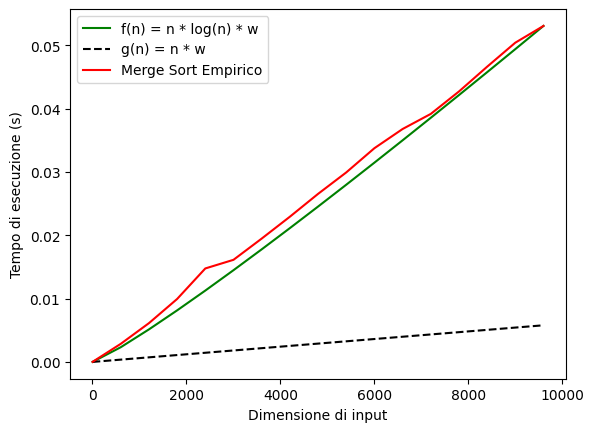

In [68]:

# Numero di operazioni teoriche che il merge sort esegue su un input di dimensione n
def merge_sort_theoretical_opertions(n):
    return n * math.log(n)


# Funzione che stima il tempo di esecuzione di un'operazione nella macchina in uso
# facendo ricorso ai risultati empirici del merge sort
def calc_operation_time():
    keys = merge_sort_results.keys()
    N = max(keys)
    time = merge_sort_results[N]

    return time / merge_sort_theoretical_opertions(N)
    

# Tempo di esecuzione di un'operazione
w = calc_operation_time()

print("Tempo di un esecuzione di un'operazione: ", w)


x = list(merge_sort_results.keys())

# f(n) = n * log(n) * w
plt.plot(x, [i * np.log(i) * w for i in x], color='green')


# g(n) = n * w
plt.plot(x, [ i * w for i in x], color='black', linestyle="dashed")

# Risultati empirici del merge sort
y = list(merge_sort_results.values())
plt.plot(x, y, color="red", linestyle='solid')


plt.legend(["f(n) = n * log(n) * w", "g(n) = n * w", "Merge Sort Empirico"])
plt.xlabel('Dimensione di input')
plt.ylabel('Tempo di esecuzione (s)')
plt.show()



Il grafico in verde rappresenta la funzione 
\begin{gather*}f(n)= w \cdot n \cdot log(n)\end{gather*}
che risulta pressoché sovrapposta al grafico delle prestazioni di Merge Sort sperimentali, ciò ci indica che la scelta fatta di w è coretta.

In questo modo risulta più evidente la differenza dei risiultati trovati con la funzione lineare

### Sovrapponiamo risultati 
Sovrapponiamo ora i risultati di Selection Sort e Merge Sort che abbiamo trovato.
Indipendentemente quindi dalla trattazione del grafico di Merge Sort, è chiaro la sostaziale discrepanza che c'è tra le prestazioni asintotiche dei due algoritmi di ordinamento. 


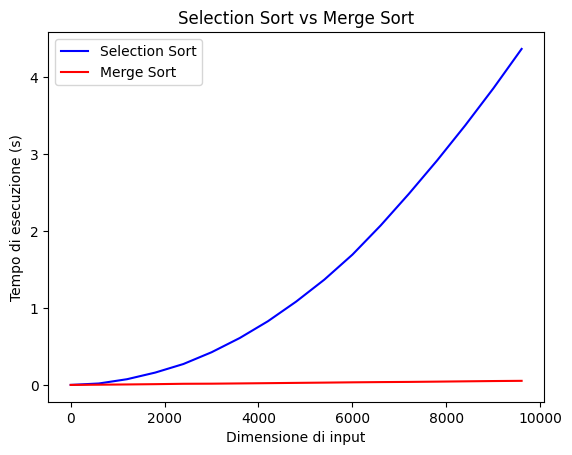

In [69]:
x1 = list(selection_sort_results.keys())
y1 = list(selection_sort_results.values())

x2 = list(merge_sort_results.keys())
y2 = list(merge_sort_results.values())

plt.title("Selection Sort vs Merge Sort")
plt.plot(x1, y1, color="blue", label="Selection Sort", linestyle='solid')
plt.plot(x2, y2, color="red", label="Merge Sort", linestyle='solid')
plt.xlabel('Dimensione di input')
plt.ylabel('Tempo di esecuzione (s)')
plt.legend()
plt.show()

# Stabilità

Verifichiamo se i due algoritmi di ordinamento sono stabili. 

Def: _Un algoritmo di ordinamento è detto stabile se, quando a seguito di un ordinamento di elementi con chiavi uguali, l'ordine relativo originale di questi elementi viene preservato_

Per testare la stabilità dei due algoritmi è necessario fare delle piccole variazione del codice dei due algoritmi
affinchè possano supportare non più liste di interi ma liste di tuple.
Ogni tupla è composta da una chiave intera e un valore di qualsiasi tipo: (key, value)

In [70]:
# IMPLEMENTAZIONE DI SELECTION SORT CON SUPPORTO PER LISTE DI TUPLE
def tuple_selection_sort(A):
    n = len(A) 

    for i in range(n - 1):
        min_index = i
        for j in range(i + 1, n):
            if A[j][0] < A[min_index][0]: # <--- Modifica per supportare le liste di tuple
                min_index = j
        A[i], A[min_index] = A[min_index], A[i]



# IMPLEMENTAZIONE DI MERGE SORT CON SUPPORTO PER LISTE DI TUPLE

def tuple_merge_sort(A):
    tuple_merge_sort_aux(A, 0, len(A) - 1)

def tuple_merge_sort_aux(A, p, r):
    if p < r:
        q = (p + r) // 2
        tuple_merge_sort_aux(A, p, q)
        tuple_merge_sort_aux(A, q + 1, r)
        tuple_merge(A, p, q, r)

def tuple_merge(A, p, q, r):
    n1 = q - p + 1
    n2 = r - q

    L = np.empty(n1 + 1, dtype=object)  # <--- Modifica per supportare le liste di tuple
    R = np.empty(n2 + 1, dtype=object) # <--- Modifica per supportare le liste di tuple

    L[:n1] = [A[p + i] for i in range(n1)]
    R[:n2] = [A[q + 1 + j] for j in range(n2)]

    # Sentinelle
    L[n1] = (np.inf, "") # <--- Modifica per supportare le liste di tuple
    R[n2] = (np.inf, "") # <--- Modifica per supportare le liste di tuple

    i = j = 0

    for k in range(p, r + 1):
        if L[i][0] <= R[j][0]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1


Funzione per verificare se un algoritmo è stabile

La funzione si basa su ordinare una lista di tuple (key, index) dove key è la chiave di ogni tupla e può essere duplicata, mentre index l'indice della tupla originale nella lista non ordinata.
Una volta ordinata la lista si verifica che tuple con stessa chiave abbiano il valore index crescente 


In [71]:
def is_sorting_algorithm_stable(sort_function, test_array_length=1000):
    # Genera una lista di tuple (int, int) con chiavi ripetute
    # Il primo elemento della tupla è la chiave, il secondo è l'indice originale nella lista non ordinata
    unsorted_list = [(random.randint(0,10), i) for i in range(test_array_length)]
    # Ordina la lista con l'algoritmo da testare
    sort_function(unsorted_list)
    # Verifica della stabilità
    for i in range(1, len(unsorted_list)):
        #  Trova due valori con stessa chiave e verifica che la loro posizione relativa non sia cambiata nella lista ordinata
        if unsorted_list[i - 1][0] == unsorted_list[i][0] and unsorted_list[i - 1][1] > unsorted_list[i][1]:
            return False

    return True

Testiamo la stabilità

In [72]:
print("Selection Sort è stabile?", "Si" if is_sorting_algorithm_stable(tuple_selection_sort)  else "No")
print("Merge Sort è stabile?", "Si" if is_sorting_algorithm_stable(tuple_merge_sort) else "No")

print("Esempio:")
A = [(1, "a"), (2, "b"), (3, "c"), (3, "d") , (2, "d"), (1, "e"), (2, "f")]
B = A.copy()

tuple_selection_sort(B)
print(B)

C = A.copy()
tuple_merge_sort(C)
print(C)


Selection Sort è stabile? No
Merge Sort è stabile? Si
Esempio:
[(1, 'a'), (1, 'e'), (2, 'd'), (2, 'b'), (2, 'f'), (3, 'd'), (3, 'c')]
[(1, 'a'), (1, 'e'), (2, 'b'), (2, 'd'), (2, 'f'), (3, 'c'), (3, 'd')]


L'esempio ci mostra evidentemente che Merge Sort è stabile mentre non si può dire lo stesso di Selection Sort.
Se non fosse stato abbastanza convincente, a rimarcare il risultato è l'output della funzione ausiliare di test.